# librerias.

In [ ]:
import torch #
import torchvision
import numpy as np
import torch.nn as nn # 
import torch. optim as optim #

from torchvision import utils #
from torchvision import datasets #
from torchvision import transforms #

from PIL import Image #
import urllib. request as request #
from matplotlib import pyplot as plt #
from torchvision import models
from torchvision import datasets

# Entrenando al modelo

In [ ]:
data_path = 'data/'

transform_set = transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize([0.5], [0.5])
                      ])

full_data_set = datasets.EMNIST(root=data_path, transform=transform_set, split='letters', download=True)


full_validation_set = datasets.EMNIST(root=data_path, transform=transform_set, split='letters', download=True)

Extracting data/EMNIST/raw/emnist.zip to data/EMNIST/raw
Processing byclass


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Processing bymerge
Processing balanced
Processing letters
Processing digits
Processing mnist
Done!


In [ ]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


i
n
o
e


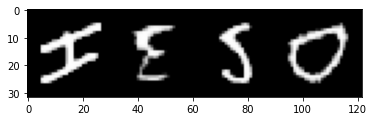

In [ ]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['a', 'b', 'c' , 'd' , 'e' ,'f' ,'g' ,'h' , 'i' , 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [ ]:
class_names = ['c', 'i']

label_map = {2: 0, 8: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [2, 8]]

validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [2, 8]]

In [ ]:
img, label = data_set[200]
img.shape

torch.Size([1, 28, 28])

In [ ]:
model = nn.Sequential(
              nn.Linear(1 * 28 * 28, 272),
              nn.Tanh(),
              nn.Linear(272, 2),
              nn.Softmax(dim=1)
            )

'c'

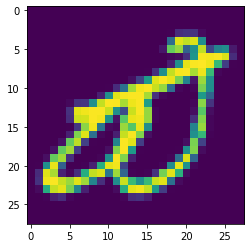

In [ ]:
img, label = data_set[500]
plt.imshow(img.squeeze())
class_names[label]

In [ ]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.4515, 0.5485]], grad_fn=<SoftmaxBackward>)

In [ ]:
_, index = torch.max(out, dim=1)

print('->', class_names[label], ' model:', class_names[index])

-> c  model: i


In [ ]:
model = nn.Sequential(
              nn.Linear(1 * 28 * 28, 272),
              nn.Tanh(),
              nn.Linear(272, 2),
              nn.LogSoftmax(dim=1)
            )

loss_function = nn.NLLLoss()

'c'

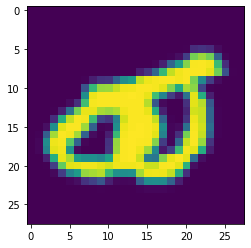

In [ ]:
img, label = data_set[120]
plt.imshow(img.squeeze())
class_names[label]

In [ ]:
model = nn.Sequential(
              nn.Linear(1 * 28 * 28, 272),
              nn.Tanh(),
              nn.Linear(272, 2),
              nn.LogSoftmax(dim=1)
            )
loss_function = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

n_epochs = 5

for epoch in range(n_epochs):
  for img, label in data_set:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_function(out, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.011652
Epoch: 1, Loss: 0.001827
Epoch: 2, Loss: 0.001354
Epoch: 3, Loss: 0.063260
Epoch: 4, Loss: 0.066160


In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
              nn.Linear(784, 272),
              nn.Tanh(),
              nn.Linear(272, 2),
              nn.LogSoftmax(dim=1)
            )

optimizer = optim.SGD(model.parameters(), lr=0.003)

loss_function = nn.NLLLoss()

n_epochs = 200

for epoch in range(n_epochs):
  for imgs, labels in train_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    loss = loss_function(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.387495
Epoch: 1, Loss: 0.261793
Epoch: 2, Loss: 0.236845
Epoch: 3, Loss: 0.162010
Epoch: 4, Loss: 0.257151
Epoch: 5, Loss: 0.191917
Epoch: 6, Loss: 0.150352
Epoch: 7, Loss: 0.261455
Epoch: 8, Loss: 0.181591
Epoch: 9, Loss: 0.148345
Epoch: 10, Loss: 0.202361
Epoch: 11, Loss: 0.199291
Epoch: 12, Loss: 0.071223
Epoch: 13, Loss: 0.066037
Epoch: 14, Loss: 0.113495
Epoch: 15, Loss: 0.074604
Epoch: 16, Loss: 0.192701
Epoch: 17, Loss: 0.082059
Epoch: 18, Loss: 0.093658
Epoch: 19, Loss: 0.205733
Epoch: 20, Loss: 0.221039
Epoch: 21, Loss: 0.204435
Epoch: 22, Loss: 0.134008
Epoch: 23, Loss: 0.126534
Epoch: 24, Loss: 0.105648
Epoch: 25, Loss: 0.122507
Epoch: 26, Loss: 0.068475
Epoch: 27, Loss: 0.172289
Epoch: 28, Loss: 0.035614
Epoch: 29, Loss: 0.128769
Epoch: 30, Loss: 0.137236
Epoch: 31, Loss: 0.214771
Epoch: 32, Loss: 0.167824
Epoch: 33, Loss: 0.144883
Epoch: 34, Loss: 0.030251
Epoch: 35, Loss: 0.111492
Epoch: 36, Loss: 0.197756
Epoch: 37, Loss: 0.086288
Epoch: 38, Loss: 0.077

In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

# no_grad() omite el cálculo del gradiente sobre los pesos
with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))

Accuracy: 0.990729


->:  i  model: i


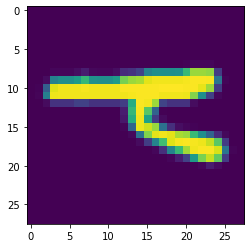

In [ ]:
img, label = validation_set[1]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ', class_names[label], ' model:', class_names[index])
plt.imshow(img.squeeze())
plt.show()

In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
              nn.Linear(784, 272),
              nn.Tanh(),
              nn.Linear(272, 136),
              nn.Tanh(),
              nn.Linear(136, 68),
              nn.Tanh(),
              nn.Linear(68, 34),
              nn.Tanh(),
              nn.Linear(34, 2)
            )

loss_function = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 100

for epoch in range(n_epochs):
  for img, label in train_loader:
    out = model(img.view(img.shape[0], -1))
    loss = loss_function(out, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Epoch: 66, Loss: 0.002394
Epoch: 66, Loss: 0.000413
Epoch: 66, Loss: 0.001884
Epoch: 66, Loss: 0.010490
Epoch: 66, Loss: 0.000866
Epoch: 66, Loss: 0.001455
Epoch: 66, Loss: 0.001052
Epoch: 66, Loss: 0.004712
Epoch: 66, Loss: 0.002287
Epoch: 66, Loss: 0.001289
Epoch: 66, Loss: 0.001644
Epoch: 66, Loss: 0.001584
Epoch: 66, Loss: 0.001411
Epoch: 66, Loss: 0.000784
Epoch: 66, Loss: 0.000759
Epoch: 66, Loss: 0.001895
Epoch: 66, Loss: 0.001625
Epoch: 66, Loss: 0.001194
Epoch: 66, Loss: 0.003584
Epoch: 66, Loss: 0.001331
Epoch: 66, Loss: 0.001937
Epoch: 66, Loss: 0.002864
Epoch: 66, Loss: 0.021940
Epoch: 66, Loss: 0.036994
Epoch: 66, Loss: 0.059305
Epoch: 66, Loss: 0.018644
Epoch: 66, Loss: 0.015983
Epoch: 66, Loss: 0.002338
Epoch: 66, Loss: 0.002886
Epoch: 66, Loss: 0.002126
Epoch: 66, Loss: 0.011290
Epoch: 66, Loss: 0.000393
Epoch: 66, Loss: 0.000757
Epoch: 66, Loss: 0.000388
Epoch: 66, Loss: 0.005262
Epoch: 66, Loss: 0.0019

In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [ ]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

262380

testeo de modelo


Correct c:   model: c


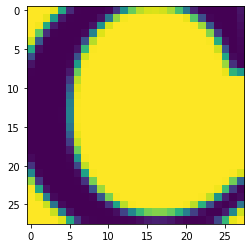

In [ ]:
url = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fst.hzcdn.com%2Fsimgs%2F9501bea6059acb36_4-4044%2Fcontemporary-house-numbers.jpg&f=1&nofb=1'

image = request.urlretrieve(url, 'c.jpg')
img = Image.open(image[0])

preprocess = transforms.Compose([
                          transforms.Resize(32),
                          transforms.CenterCrop(28),
                          transforms.ToTensor(),
                          transforms.Normalize(
                              mean=[0.5],
                              std=[0.5]
                          )
                        ])

img_t = preprocess(img)

out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('Correct c: ', ' model:', class_names[index])
plt.imshow(img_t.squeeze())